다양한 기계학습 방법을 통해 online 뉴스 인기도 예측력를 극대화
 
최종 평가는 아래 test 데이터를 활용, 최종 예측 평가 지표는 MAE (Mean Absolute Error).

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from graphviz import Source
from IPython.display import Image
from sklearn.tree import export_graphviz

#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

## for regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

sns.set_style("whitegrid")

In [88]:
# from google.colab import drive
# drive.mount('/content/drive')

In [89]:
path = "onlinenews.csv"
data = pd.read_csv(path, engine='python')
print("- Data has {} rows and {} columns.".format(*data.shape))
print("- Column names: ", list(data.columns))

X = data.drop([' shares'], axis=1)
y = data[' shares']

- Data has 39644 rows and 60 columns.
- Column names:  [' timedelta', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', ' global

데이터 6:2:2 Train valid test 구분

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=2015010720)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size=0.25,
                                                      random_state=2015010720)

# X_valid = scaler.transform(X_valid)

최적 파라미터 조정 없이 학습 및 테스트 진행

In [91]:
clf_dt = DecisionTreeRegressor(criterion='squared_error', max_depth=None)
clf_dt.fit(X_train, y_train)
y_train_pred = clf_dt.predict(X_train)
y_valid_pred = clf_dt.predict(X_valid)
y_test_pred = clf_dt.predict(X_test)

In [92]:
# Show train & validation accuracies
print('- MSE (Train)      : {:.4}'.format(mean_squared_error(y_train, y_train_pred)))
print('- MSE (Validation) : {:.4}'.format(mean_squared_error(y_valid, y_valid_pred)))
print('- MSE (test) : {:.4}'.format(mean_squared_error(y_test, y_test_pred)))
print('- MAE (Train)      : {:.4}'.format(mean_absolute_error(y_train, y_train_pred)))
print('- MAE (Validation) : {:}'.format(round(mean_absolute_error(y_valid, y_valid_pred))))
print('- MAE (Validation) : {:}'.format(round(mean_absolute_error(y_test, y_test_pred))))

- MSE (Train)      : 0.0
- MSE (Validation) : 3.373e+08
- MSE (test) : 4.695e+08
- MAE (Train)      : 0.0
- MAE (Validation) : 4406
- MAE (Validation) : 4657


---

### EDA

In [93]:
# 기초 통계 및 결측치 확인
print("=== X 요약 통계 ===")
print(X.describe().T)
print("\n=== y 요약 통계 ===")
print(y.describe())
print("\n=== 결측치 개수 ===")
na_X = X.isna().sum()
na_y = pd.Series({'y': y.isna().sum()})
print(pd.concat([na_X, na_y], axis=1, keys=['X','y']))

=== X 요약 통계 ===
                                 count           mean            std      min  \
timedelta                      39644.0     354.530471     214.163767  8.00000   
n_tokens_title                 39644.0      10.398749       2.114037  2.00000   
n_tokens_content               39644.0     546.514731     471.107508  0.00000   
n_unique_tokens                39644.0       0.548216       3.520708  0.00000   
n_non_stop_words               39644.0       0.996469       5.231231  0.00000   
n_non_stop_unique_tokens       39644.0       0.689175       3.264816  0.00000   
num_hrefs                      39644.0      10.883690      11.332017  0.00000   
num_self_hrefs                 39644.0       3.293638       3.855141  0.00000   
num_imgs                       39644.0       4.544143       8.309434  0.00000   
num_videos                     39644.0       1.249874       4.107855  0.00000   
average_token_length           39644.0       4.548239       0.844406  0.00000   
num_keywords

Skewness of y: 33.9639


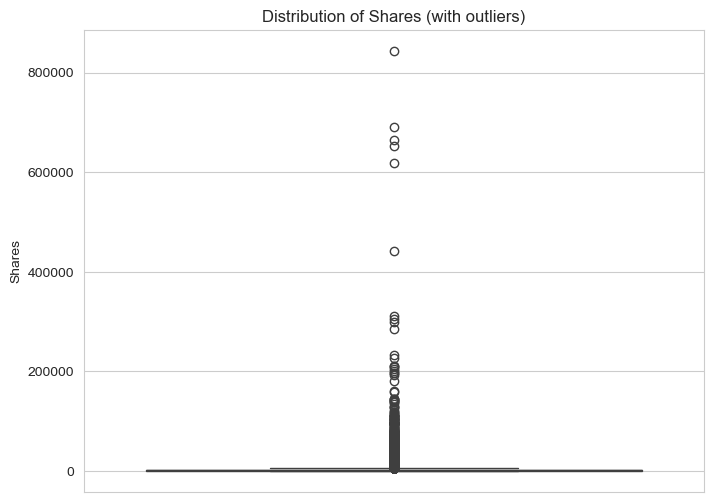

In [94]:
# y 왜도 계산 및 이상치 파악 (전체)
skewness = y.skew()
print(f'Skewness of y: {skewness:.4f}')
      
plt.figure(figsize=(8, 6))
sns.boxplot(y=y)
plt.title('Distribution of Shares (with outliers)')
plt.ylabel('Shares')
plt.show()


=== X feature skewness ===
n_non_stop_words                 198.792445
n_unique_tokens                  198.655116
n_non_stop_unique_tokens         198.443294
kw_max_min                        35.328434
kw_avg_min                        31.306108
self_reference_min_shares         26.264364
self_reference_avg_sharess        17.914093
kw_max_avg                        16.411670
self_reference_max_shares         13.870849
kw_min_max                        10.386372
num_videos                         7.019533
kw_avg_avg                         5.760177
num_self_hrefs                     5.172751
num_hrefs                          4.013495
data_channel_is_lifestyle          3.993019
num_imgs                           3.946596
data_channel_is_socmed             3.758880
weekday_is_saturday                3.637086
weekday_is_sunday                  3.399927
min_positive_polarity              3.040468
n_tokens_content                   2.945422
kw_min_min                         2.374947
is_w

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/3812532366.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skewness.values, y=skewness.index, palette='viridis')


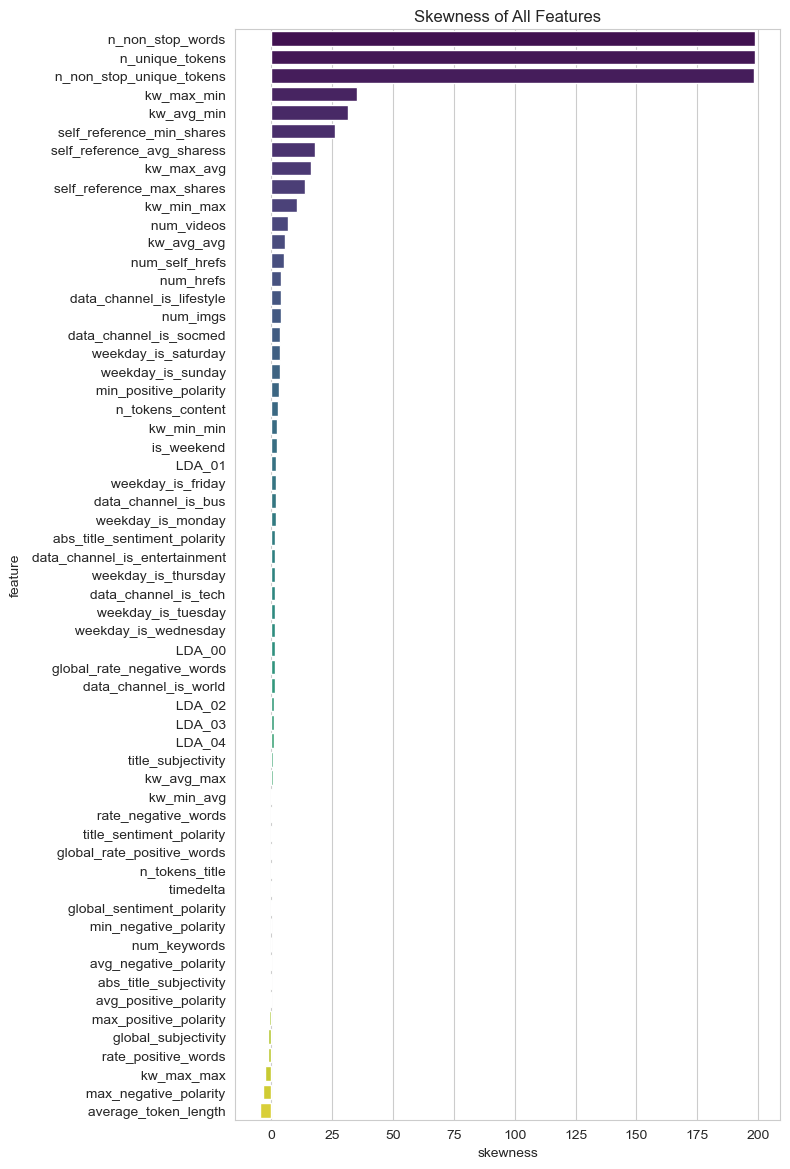

In [95]:
# X 모든 특성의 왜도 계산 및 시각화 (전체)
skewness = X.skew().sort_values(ascending=False)
print("\n=== X feature skewness ===")
print(skewness)
plt.figure(figsize=(8, len(skewness)*0.2))
sns.barplot(x=skewness.values, y=skewness.index, palette='viridis')
plt.title('Skewness of All Features')
plt.xlabel('skewness')
plt.ylabel('feature')
plt.tight_layout()
plt.show()

### 모델 + 이상치제거, x,y 로그변환, PowerTransformer 조합 분석

In [ ]:
from sklearn.base import clone
from tqdm import tqdm
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    ExtraTreesRegressor,
    GradientBoostingRegressor,
    HistGradientBoostingRegressor,
    AdaBoostRegressor
)

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


# 1) 실행할 모델 정의
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'KNeighbors': KNeighborsRegressor(),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'ExtraTrees': ExtraTreesRegressor(n_estimators=50, random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=50, random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'HistGradientBoosting': HistGradientBoostingRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(random_state=42, verbosity=0),
    'LGBMRegressor': LGBMRegressor(random_state=42),
    'CatBoostRegressor': CatBoostRegressor(random_state=42, verbose=False)
}

# 2) 전처리 조합 리스트 (use_log: x+y 로그 변환, use_pt: PowerTransformer)
combos = [
    {'name': 'raw',                  'remove_pct': None,    'use_iqr': False, 'use_log': False, 'use_pt': False},
    {'name': 'logXY',                'remove_pct': None,    'use_iqr': False, 'use_log': True,  'use_pt': False},
    {'name': 'PT only',              'remove_pct': None,    'use_iqr': False, 'use_log': False, 'use_pt': True},
    {'name': 'logXY + PT',           'remove_pct': None,    'use_iqr': False, 'use_log': True,  'use_pt': True},
    {'name': 'remove 1%',            'remove_pct': 0.99,    'use_iqr': False, 'use_log': False, 'use_pt': False},
    {'name': 'remove 1% + logXY',    'remove_pct': 0.99,    'use_iqr': False, 'use_log': True,  'use_pt': False},
    {'name': 'remove 1% + PT',       'remove_pct': 0.99,    'use_iqr': False, 'use_log': False, 'use_pt': True},
    {'name': 'remove 1% + logXY+PT', 'remove_pct': 0.99,    'use_iqr': False, 'use_log': True,  'use_pt': True},
    {'name': 'remove 0.5%',          'remove_pct': 0.995,   'use_iqr': False, 'use_log': False, 'use_pt': False},
    {'name': 'remove 0.5%+logXY',    'remove_pct': 0.995,   'use_iqr': False, 'use_log': True,  'use_pt': False},
    {'name': 'remove 0.5%+PT',       'remove_pct': 0.995,   'use_iqr': False, 'use_log': False, 'use_pt': True},
    {'name': 'remove0.5%+logXY+PT',  'remove_pct': 0.995,   'use_iqr': False, 'use_log': True,  'use_pt': True},
    {'name': 'IQR',                  'remove_pct': None,    'use_iqr': True,  'use_log': False, 'use_pt': False},
    {'name': 'IQR + logXY',          'remove_pct': None,    'use_iqr': True,  'use_log': True,  'use_pt': False},
    {'name': 'IQR + PT',             'remove_pct': None,    'use_iqr': True,  'use_log': False, 'use_pt': True},
    {'name': 'IQR+logXY+PT',         'remove_pct': None,    'use_iqr': True,  'use_log': True,  'use_pt': True}
]

# 3) 전처리·평가 함수 (이상치제거 → x/y 로그 → PT → 학습 → y 복원 → 평가)
def preprocess_and_eval(model, X_tr, y_tr, X_te, y_te,
                        remove_pct=None, use_iqr=False,
                        use_log=False, use_pt=False):
    Xc, yc = X_tr.copy(), y_tr.copy()

    # 1) 이상치 제거 (y 기준)
    if use_iqr:
        Q1, Q3 = np.percentile(yc, [25, 75])
        mask = (yc >= Q1 - 1.5*(Q3-Q1)) & (yc <= Q3 + 1.5*(Q3-Q1))
        Xc, yc = Xc[mask], yc[mask]
    elif remove_pct is not None:
        thresh = np.percentile(yc, remove_pct*100)
        mask = yc <= thresh
        Xc, yc = Xc[mask], yc[mask]

    # 2) 로그 변환 (x는 skew>1 & non-negative 컬럼만, y 전체)
    if use_log:
        # y 로그
        yc = np.log1p(yc)
        # x selective 로그
        skew_cols = Xc.columns[(Xc.skew().abs() > 1) & (Xc.min() >= 0)]
        Xc[skew_cols] = np.log1p(Xc[skew_cols])
        Xc = np.nan_to_num(Xc, neginf=0, posinf=0)

    # 3) PowerTransformer (x)
    if use_pt:
        pt = PowerTransformer(method='yeo-johnson')
        Xc = pt.fit_transform(Xc)
        Xc = np.nan_to_num(Xc, neginf=0, posinf=0)
        # test에도 동일 변환
        Xte = X_te.copy()
        if use_log:
            Xte[skew_cols] = np.log1p(Xte[skew_cols])
        Xte = pt.transform(np.nan_to_num(Xte, neginf=0, posinf=0))
    else:
        Xte = X_te.copy()
        if use_log:
            Xte[skew_cols] = np.log1p(Xte[skew_cols])
            Xte = np.nan_to_num(Xte, neginf=0, posinf=0)

    # 4) 학습·예측
    clf = clone(model)
    clf.fit(Xc, yc)
    y_pred_log = clf.predict(Xte)

    # 5) y 복원
    if use_log:
        y_pred = np.expm1(y_pred_log)
    else:
        y_pred = y_pred_log

    # 6) 평가
    return mean_squared_error(y_te, y_pred), mean_absolute_error(y_te, y_pred)

# 4) 일괄 실행 및 결과 수집
results = []
for model_name, model in models.items():
    print(f'\n=== {model_name} ===')
    for combo in tqdm(combos, desc=model_name):
        mse, mae = preprocess_and_eval(
            model, X_train, y_train, X_test, y_test,
            remove_pct=combo['remove_pct'],
            use_iqr=combo['use_iqr'],
            use_log=combo['use_log'],
            use_pt=combo['use_pt']
        )
        print(f"{combo['name']:20s} → MSE: {mse:.4e}, MAE: {mae:.4f}")
        results.append({
            'model': model_name,
            'combo': combo['name'],
            'MSE': mse,
            'MAE': mae
        })

# 5) DataFrame 변환, MAE 기준 정렬
df = pd.DataFrame(results).sort_values(by='MAE', ascending=True)


=== LinearRegression ===


LinearRegression:  12%|█▎        | 2/16 [00:00<00:01, 12.57it/s]

raw                  → MSE: 1.4615e+08, MAE: 3054.4219
logXY                → MSE: 1.4878e+08, MAE: 2369.0533


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


PT only              → MSE: 1.4546e+08, MAE: 3092.2512


LinearRegression:  25%|██▌       | 4/16 [00:01<00:03,  3.51it/s]

logXY + PT           → MSE: 1.4856e+08, MAE: 2363.3081
remove 1%            → MSE: 1.4647e+08, MAE: 2644.2282
remove 1% + logXY    → MSE: 1.4920e+08, MAE: 2356.9300


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
LinearRegression:  44%|████▍     | 7/16 [00:01<00:01,  4.60it/s]

remove 1% + PT       → MSE: 1.4607e+08, MAE: 2639.3857


LinearRegression:  50%|█████     | 8/16 [00:01<00:02,  3.88it/s]

remove 1% + logXY+PT → MSE: 1.4900e+08, MAE: 2351.9106
remove 0.5%          → MSE: 1.4604e+08, MAE: 2738.4920
remove 0.5%+logXY    → MSE: 1.4901e+08, MAE: 2362.5999


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
LinearRegression:  69%|██████▉   | 11/16 [00:02<00:01,  4.60it/s]

remove 0.5%+PT       → MSE: 1.4562e+08, MAE: 2732.8567


LinearRegression:  88%|████████▊ | 14/16 [00:03<00:00,  5.14it/s]

remove0.5%+logXY+PT  → MSE: 1.4881e+08, MAE: 2357.1015
IQR                  → MSE: 1.5009e+08, MAE: 2361.7519
IQR + logXY          → MSE: 1.5107e+08, MAE: 2348.2890


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
LinearRegression:  94%|█████████▍| 15/16 [00:03<00:00,  4.26it/s]

IQR + PT             → MSE: 1.4998e+08, MAE: 2358.6995


LinearRegression: 100%|██████████| 16/16 [00:03<00:00,  4.20it/s]


IQR+logXY+PT         → MSE: 1.5098e+08, MAE: 2345.8514

=== Ridge ===


Ridge:   0%|          | 0/16 [00:00<?, ?it/s]

raw                  → MSE: 1.4613e+08, MAE: 3052.4784
logXY                → MSE: 1.4878e+08, MAE: 2368.8089


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
Ridge:  19%|█▉        | 3/16 [00:00<00:02,  5.63it/s]

PT only              → MSE: 1.4546e+08, MAE: 3092.2546


Ridge:  25%|██▌       | 4/16 [00:00<00:03,  3.89it/s]

logXY + PT           → MSE: 1.4856e+08, MAE: 2363.2830
remove 1%            → MSE: 1.4647e+08, MAE: 2644.1570
remove 1% + logXY    → MSE: 1.4920e+08, MAE: 2356.8532


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
Ridge:  44%|████▍     | 7/16 [00:01<00:01,  4.97it/s]

remove 1% + PT       → MSE: 1.4607e+08, MAE: 2639.3902


Ridge:  50%|█████     | 8/16 [00:01<00:01,  4.07it/s]

remove 1% + logXY+PT → MSE: 1.4900e+08, MAE: 2351.8953
remove 0.5%          → MSE: 1.4603e+08, MAE: 2737.5928
remove 0.5%+logXY    → MSE: 1.4901e+08, MAE: 2362.3855


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
Ridge:  69%|██████▉   | 11/16 [00:02<00:01,  4.82it/s]

remove 0.5%+PT       → MSE: 1.4562e+08, MAE: 2732.8579


Ridge:  75%|███████▌  | 12/16 [00:02<00:00,  4.03it/s]

remove0.5%+logXY+PT  → MSE: 1.4881e+08, MAE: 2357.0818
IQR                  → MSE: 1.5009e+08, MAE: 2361.7377
IQR + logXY          → MSE: 1.5107e+08, MAE: 2348.3204


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
Ridge:  94%|█████████▍| 15/16 [00:03<00:00,  4.85it/s]

IQR + PT             → MSE: 1.4998e+08, MAE: 2358.7038


Ridge: 100%|██████████| 16/16 [00:03<00:00,  4.41it/s]


IQR+logXY+PT         → MSE: 1.5098e+08, MAE: 2345.8726

=== Lasso ===


Lasso:   0%|          | 0/16 [00:00<?, ?it/s]/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.677e+12, tolerance: 3.516e+08
  model = cd_fast.enet_coordinate_descent(
Lasso:   6%|▋         | 1/16 [00:04<01:06,  4.41s/it]

raw                  → MSE: 1.4604e+08, MAE: 3044.4905
logXY                → MSE: 1.5016e+08, MAE: 2451.7893


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
Lasso:  19%|█▉        | 3/16 [00:07<00:28,  2.18s/it]

PT only              → MSE: 1.4545e+08, MAE: 3091.3608


Lasso:  25%|██▌       | 4/16 [00:07<00:18,  1.57s/it]

logXY + PT           → MSE: 1.5039e+08, MAE: 2463.6460


Lasso:  31%|███▏      | 5/16 [00:08<00:13,  1.27s/it]

remove 1%            → MSE: 1.4647e+08, MAE: 2644.1412
remove 1% + logXY    → MSE: 1.5041e+08, MAE: 2440.0053


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
Lasso:  44%|████▍     | 7/16 [00:10<00:10,  1.15s/it]

remove 1% + PT       → MSE: 1.4608e+08, MAE: 2639.8814


Lasso:  50%|█████     | 8/16 [00:10<00:07,  1.05it/s]

remove 1% + logXY+PT → MSE: 1.5059e+08, MAE: 2451.9822


Lasso:  56%|█████▋    | 9/16 [00:11<00:05,  1.17it/s]

remove 0.5%          → MSE: 1.4601e+08, MAE: 2735.7608
remove 0.5%+logXY    → MSE: 1.5030e+08, MAE: 2445.3367


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
Lasso:  69%|██████▉   | 11/16 [00:13<00:04,  1.10it/s]

remove 0.5%+PT       → MSE: 1.4561e+08, MAE: 2732.9592


Lasso:  75%|███████▌  | 12/16 [00:13<00:03,  1.27it/s]

remove0.5%+logXY+PT  → MSE: 1.5050e+08, MAE: 2457.2591


Lasso:  81%|████████▏ | 13/16 [00:14<00:02,  1.48it/s]

IQR                  → MSE: 1.5011e+08, MAE: 2363.7266
IQR + logXY          → MSE: 1.5170e+08, MAE: 2420.4735


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
Lasso:  94%|█████████▍| 15/16 [00:15<00:00,  1.59it/s]

IQR + PT             → MSE: 1.4999e+08, MAE: 2359.6866


Lasso: 100%|██████████| 16/16 [00:15<00:00,  1.03it/s]


IQR+logXY+PT         → MSE: 1.5177e+08, MAE: 2428.6351

=== KNeighbors ===


KNeighbors:  12%|█▎        | 2/16 [00:00<00:03,  4.64it/s]

raw                  → MSE: 1.5835e+08, MAE: 3230.4389
logXY                → MSE: 1.5029e+08, MAE: 2583.3318


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
KNeighbors:  19%|█▉        | 3/16 [00:00<00:04,  2.97it/s]

PT only              → MSE: 1.5628e+08, MAE: 3145.0006


KNeighbors:  31%|███▏      | 5/16 [00:01<00:03,  3.48it/s]

logXY + PT           → MSE: 1.4831e+08, MAE: 2474.3883
remove 1%            → MSE: 1.4965e+08, MAE: 2838.1015


KNeighbors:  38%|███▊      | 6/16 [00:01<00:02,  4.24it/s]

remove 1% + logXY    → MSE: 1.5024e+08, MAE: 2533.9162


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
KNeighbors:  44%|████▍     | 7/16 [00:02<00:02,  3.29it/s]

remove 1% + PT       → MSE: 1.4713e+08, MAE: 2731.2119


KNeighbors:  56%|█████▋    | 9/16 [00:02<00:01,  3.60it/s]

remove 1% + logXY+PT → MSE: 1.4865e+08, MAE: 2439.7070
remove 0.5%          → MSE: 1.5064e+08, MAE: 2963.5664


KNeighbors:  62%|██████▎   | 10/16 [00:02<00:01,  4.25it/s]

remove 0.5%+logXY    → MSE: 1.5026e+08, MAE: 2556.8619


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
KNeighbors:  69%|██████▉   | 11/16 [00:03<00:01,  3.33it/s]

remove 0.5%+PT       → MSE: 1.4777e+08, MAE: 2823.5035


KNeighbors:  81%|████████▏ | 13/16 [00:03<00:00,  3.59it/s]

remove0.5%+logXY+PT  → MSE: 1.4855e+08, MAE: 2452.6151
IQR                  → MSE: 1.5050e+08, MAE: 2450.1682


KNeighbors:  88%|████████▊ | 14/16 [00:03<00:00,  4.29it/s]

IQR + logXY          → MSE: 1.5149e+08, MAE: 2452.7527


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
KNeighbors:  94%|█████████▍| 15/16 [00:04<00:00,  3.55it/s]

IQR + PT             → MSE: 1.5012e+08, MAE: 2393.1101


KNeighbors: 100%|██████████| 16/16 [00:04<00:00,  3.36it/s]


IQR+logXY+PT         → MSE: 1.5091e+08, MAE: 2382.4125

=== DecisionTree ===


DecisionTree:   6%|▋         | 1/16 [00:01<00:16,  1.08s/it]

raw                  → MSE: 4.9251e+08, MAE: 4694.8740


DecisionTree:  12%|█▎        | 2/16 [00:01<00:12,  1.13it/s]

logXY                → MSE: 4.6353e+08, MAE: 4294.3101


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
DecisionTree:  19%|█▉        | 3/16 [00:03<00:14,  1.11s/it]

PT only              → MSE: 4.9334e+08, MAE: 4531.0320


DecisionTree:  25%|██▌       | 4/16 [00:04<00:13,  1.10s/it]

logXY + PT           → MSE: 5.2029e+08, MAE: 4448.1903


DecisionTree:  31%|███▏      | 5/16 [00:05<00:11,  1.03s/it]

remove 1%            → MSE: 1.6008e+08, MAE: 3379.8002


DecisionTree:  38%|███▊      | 6/16 [00:05<00:09,  1.06it/s]

remove 1% + logXY    → MSE: 1.5939e+08, MAE: 3311.5801


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
DecisionTree:  44%|████▍     | 7/16 [00:07<00:09,  1.04s/it]

remove 1% + PT       → MSE: 1.5943e+08, MAE: 3342.0733


DecisionTree:  50%|█████     | 8/16 [00:08<00:08,  1.05s/it]

remove 1% + logXY+PT → MSE: 1.5811e+08, MAE: 3259.0581


DecisionTree:  56%|█████▋    | 9/16 [00:09<00:07,  1.02s/it]

remove 0.5%          → MSE: 1.6728e+08, MAE: 3624.7430


DecisionTree:  62%|██████▎   | 10/16 [00:09<00:05,  1.07it/s]

remove 0.5%+logXY    → MSE: 1.6795e+08, MAE: 3502.8639


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
DecisionTree:  69%|██████▉   | 11/16 [00:11<00:05,  1.04s/it]

remove 0.5%+PT       → MSE: 1.6724e+08, MAE: 3660.2761


DecisionTree:  75%|███████▌  | 12/16 [00:12<00:04,  1.05s/it]

remove0.5%+logXY+PT  → MSE: 1.7136e+08, MAE: 3564.3611


DecisionTree:  81%|████████▏ | 13/16 [00:13<00:02,  1.07it/s]

IQR                  → MSE: 1.5095e+08, MAE: 2587.9155


DecisionTree:  88%|████████▊ | 14/16 [00:13<00:01,  1.18it/s]

IQR + logXY          → MSE: 1.5067e+08, MAE: 2580.1488


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
DecisionTree:  94%|█████████▍| 15/16 [00:14<00:00,  1.11it/s]

IQR + PT             → MSE: 1.5072e+08, MAE: 2589.8068


DecisionTree: 100%|██████████| 16/16 [00:15<00:00,  1.03it/s]


IQR+logXY+PT         → MSE: 1.5094e+08, MAE: 2590.0343

=== ExtraTrees ===


ExtraTrees:   6%|▋         | 1/16 [00:07<01:51,  7.43s/it]

raw                  → MSE: 1.5478e+08, MAE: 3359.4221


ExtraTrees:  12%|█▎        | 2/16 [00:14<01:39,  7.09s/it]

logXY                → MSE: 1.4738e+08, MAE: 2359.5051


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
ExtraTrees:  19%|█▉        | 3/16 [00:22<01:36,  7.44s/it]

PT only              → MSE: 1.5485e+08, MAE: 3430.2516


ExtraTrees:  25%|██▌       | 4/16 [00:29<01:28,  7.41s/it]

logXY + PT           → MSE: 1.4779e+08, MAE: 2365.6663


ExtraTrees:  31%|███▏      | 5/16 [00:36<01:19,  7.22s/it]

remove 1%            → MSE: 1.4563e+08, MAE: 2754.8766


ExtraTrees:  38%|███▊      | 6/16 [00:43<01:10,  7.03s/it]

remove 1% + logXY    → MSE: 1.4818e+08, MAE: 2339.9808


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
ExtraTrees:  44%|████▍     | 7/16 [00:50<01:04,  7.16s/it]

remove 1% + PT       → MSE: 1.4508e+08, MAE: 2748.6603


ExtraTrees:  50%|█████     | 8/16 [00:57<00:57,  7.18s/it]

remove 1% + logXY+PT → MSE: 1.4834e+08, MAE: 2346.0318


ExtraTrees:  56%|█████▋    | 9/16 [01:04<00:49,  7.12s/it]

remove 0.5%          → MSE: 1.4532e+08, MAE: 2880.4177


ExtraTrees:  62%|██████▎   | 10/16 [01:11<00:42,  7.01s/it]

remove 0.5%+logXY    → MSE: 1.4797e+08, MAE: 2346.0074


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
ExtraTrees:  69%|██████▉   | 11/16 [01:18<00:35,  7.17s/it]

remove 0.5%+PT       → MSE: 1.4511e+08, MAE: 2903.5330


ExtraTrees:  75%|███████▌  | 12/16 [01:26<00:28,  7.21s/it]

remove0.5%+logXY+PT  → MSE: 1.4788e+08, MAE: 2351.6940


ExtraTrees:  81%|████████▏ | 13/16 [01:32<00:20,  6.76s/it]

IQR                  → MSE: 1.4958e+08, MAE: 2354.3449


ExtraTrees:  88%|████████▊ | 14/16 [01:37<00:12,  6.48s/it]

IQR + logXY          → MSE: 1.5086e+08, MAE: 2333.7243


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
ExtraTrees:  94%|█████████▍| 15/16 [01:44<00:06,  6.45s/it]

IQR + PT             → MSE: 1.4954e+08, MAE: 2354.4284


ExtraTrees: 100%|██████████| 16/16 [01:50<00:00,  6.91s/it]


IQR+logXY+PT         → MSE: 1.5074e+08, MAE: 2333.9392

=== RandomForest ===


RandomForest:   6%|▋         | 1/16 [00:32<08:03, 32.22s/it]

raw                  → MSE: 1.5678e+08, MAE: 3403.8136


RandomForest:  12%|█▎        | 2/16 [00:54<06:08, 26.34s/it]

logXY                → MSE: 1.4790e+08, MAE: 2369.9257


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
RandomForest:  19%|█▉        | 3/16 [01:27<06:20, 29.24s/it]

PT only              → MSE: 1.5749e+08, MAE: 3430.1657


RandomForest:  25%|██▌       | 4/16 [01:49<05:19, 26.64s/it]

logXY + PT           → MSE: 1.4798e+08, MAE: 2369.7801


RandomForest:  31%|███▏      | 5/16 [02:17<04:57, 27.05s/it]

remove 1%            → MSE: 1.4612e+08, MAE: 2773.4278


RandomForest:  38%|███▊      | 6/16 [02:39<04:12, 25.26s/it]

remove 1% + logXY    → MSE: 1.4851e+08, MAE: 2349.8722


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
RandomForest:  44%|████▍     | 7/16 [03:07<03:56, 26.23s/it]

remove 1% + PT       → MSE: 1.4593e+08, MAE: 2771.5119


RandomForest:  50%|█████     | 8/16 [03:30<03:20, 25.09s/it]

remove 1% + logXY+PT → MSE: 1.4850e+08, MAE: 2347.7229


RandomForest:  56%|█████▋    | 9/16 [03:59<03:04, 26.32s/it]

remove 0.5%          → MSE: 1.4633e+08, MAE: 2929.3327


RandomForest:  62%|██████▎   | 10/16 [04:21<02:29, 24.97s/it]

remove 0.5%+logXY    → MSE: 1.4819e+08, MAE: 2359.1299


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
RandomForest:  69%|██████▉   | 11/16 [04:50<02:11, 26.33s/it]

remove 0.5%+PT       → MSE: 1.4624e+08, MAE: 2929.3867


RandomForest:  75%|███████▌  | 12/16 [05:12<01:40, 25.12s/it]

remove0.5%+logXY+PT  → MSE: 1.4829e+08, MAE: 2359.4170


RandomForest:  81%|████████▏ | 13/16 [05:33<01:11, 23.81s/it]

IQR                  → MSE: 1.4960e+08, MAE: 2353.1683


RandomForest:  88%|████████▊ | 14/16 [05:52<00:44, 22.28s/it]

IQR + logXY          → MSE: 1.5079e+08, MAE: 2333.1758


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
RandomForest:  94%|█████████▍| 15/16 [06:13<00:21, 21.97s/it]

IQR + PT             → MSE: 1.4961e+08, MAE: 2354.0967


RandomForest: 100%|██████████| 16/16 [06:32<00:00, 24.56s/it]


IQR+logXY+PT         → MSE: 1.5079e+08, MAE: 2332.6704

=== AdaBoost ===


AdaBoost:   6%|▋         | 1/16 [00:02<00:42,  2.81s/it]

raw                  → MSE: 6.9676e+08, MAE: 23075.5807


AdaBoost:  12%|█▎        | 2/16 [00:06<00:43,  3.11s/it]

logXY                → MSE: 1.4656e+08, MAE: 2963.7575


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
AdaBoost:  19%|█▉        | 3/16 [00:09<00:41,  3.16s/it]

PT only              → MSE: 6.6132e+08, MAE: 22512.6563


AdaBoost:  25%|██▌       | 4/16 [00:13<00:40,  3.39s/it]

logXY + PT           → MSE: 1.4652e+08, MAE: 2952.4046


AdaBoost:  31%|███▏      | 5/16 [00:14<00:28,  2.55s/it]

remove 1%            → MSE: 1.4682e+08, MAE: 3588.2766


AdaBoost:  38%|███▊      | 6/16 [00:17<00:27,  2.79s/it]

remove 1% + logXY    → MSE: 1.4763e+08, MAE: 2528.7727


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
AdaBoost:  44%|████▍     | 7/16 [00:19<00:23,  2.58s/it]

remove 1% + PT       → MSE: 1.4983e+08, MAE: 4350.0559


AdaBoost:  50%|█████     | 8/16 [00:23<00:23,  2.91s/it]

remove 1% + logXY+PT → MSE: 1.4814e+08, MAE: 2481.4635


AdaBoost:  56%|█████▋    | 9/16 [00:24<00:17,  2.44s/it]

remove 0.5%          → MSE: 1.6098e+08, MAE: 5509.8385


AdaBoost:  62%|██████▎   | 10/16 [00:27<00:16,  2.70s/it]

remove 0.5%+logXY    → MSE: 1.4704e+08, MAE: 2577.6743


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
AdaBoost:  69%|██████▉   | 11/16 [00:29<00:11,  2.32s/it]

remove 0.5%+PT       → MSE: 1.5223e+08, MAE: 4120.0531


AdaBoost:  75%|███████▌  | 12/16 [00:32<00:10,  2.73s/it]

remove0.5%+logXY+PT  → MSE: 1.4708e+08, MAE: 2601.6728


AdaBoost:  81%|████████▏ | 13/16 [00:34<00:06,  2.21s/it]

IQR                  → MSE: 1.4904e+08, MAE: 2471.7109


AdaBoost:  88%|████████▊ | 14/16 [00:37<00:04,  2.45s/it]

IQR + logXY          → MSE: 1.5225e+08, MAE: 2426.6162


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
AdaBoost:  94%|█████████▍| 15/16 [00:38<00:02,  2.29s/it]

IQR + PT             → MSE: 1.4893e+08, MAE: 2499.0280


AdaBoost: 100%|██████████| 16/16 [00:42<00:00,  2.64s/it]


IQR+logXY+PT         → MSE: 1.5245e+08, MAE: 2437.5628

=== GradientBoosting ===


GradientBoosting:   6%|▋         | 1/16 [00:12<03:11, 12.77s/it]

raw                  → MSE: 1.4895e+08, MAE: 3025.2627


GradientBoosting:  12%|█▎        | 2/16 [00:25<02:58, 12.76s/it]

logXY                → MSE: 1.4827e+08, MAE: 2333.4397


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
GradientBoosting:  19%|█▉        | 3/16 [00:38<02:48, 12.93s/it]

PT only              → MSE: 1.4761e+08, MAE: 3016.2191


GradientBoosting:  25%|██▌       | 4/16 [00:51<02:35, 12.99s/it]

logXY + PT           → MSE: 1.4827e+08, MAE: 2334.3818


GradientBoosting:  31%|███▏      | 5/16 [01:04<02:21, 12.86s/it]

remove 1%            → MSE: 1.4571e+08, MAE: 2612.8664


GradientBoosting:  38%|███▊      | 6/16 [01:17<02:08, 12.86s/it]

remove 1% + logXY    → MSE: 1.4877e+08, MAE: 2324.3207


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
GradientBoosting:  44%|████▍     | 7/16 [01:30<01:57, 13.10s/it]

remove 1% + PT       → MSE: 1.4582e+08, MAE: 2615.4335


GradientBoosting:  50%|█████     | 8/16 [01:44<01:46, 13.35s/it]

remove 1% + logXY+PT → MSE: 1.4877e+08, MAE: 2324.4465


GradientBoosting:  56%|█████▋    | 9/16 [01:58<01:33, 13.39s/it]

remove 0.5%          → MSE: 1.4545e+08, MAE: 2717.2984


GradientBoosting:  62%|██████▎   | 10/16 [02:11<01:19, 13.28s/it]

remove 0.5%+logXY    → MSE: 1.4859e+08, MAE: 2327.2043


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
GradientBoosting:  69%|██████▉   | 11/16 [02:24<01:06, 13.28s/it]

remove 0.5%+PT       → MSE: 1.4547e+08, MAE: 2717.2434


GradientBoosting:  75%|███████▌  | 12/16 [02:37<00:53, 13.26s/it]

remove0.5%+logXY+PT  → MSE: 1.4857e+08, MAE: 2327.5559


GradientBoosting:  81%|████████▏ | 13/16 [02:49<00:38, 12.69s/it]

IQR                  → MSE: 1.4986e+08, MAE: 2336.4388


GradientBoosting:  88%|████████▊ | 14/16 [03:00<00:24, 12.30s/it]

IQR + logXY          → MSE: 1.5091e+08, MAE: 2325.4720


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
GradientBoosting:  94%|█████████▍| 15/16 [03:12<00:12, 12.12s/it]

IQR + PT             → MSE: 1.4988e+08, MAE: 2336.7665


GradientBoosting: 100%|██████████| 16/16 [03:23<00:00, 12.74s/it]


IQR+logXY+PT         → MSE: 1.5091e+08, MAE: 2325.8476

=== HistGradientBoosting ===


HistGradientBoosting:   6%|▋         | 1/16 [00:00<00:02,  6.90it/s]

raw                  → MSE: 1.4776e+08, MAE: 3079.2895


HistGradientBoosting:  12%|█▎        | 2/16 [00:00<00:03,  3.67it/s]

logXY                → MSE: 1.4820e+08, MAE: 2338.1709


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
HistGradientBoosting:  19%|█▉        | 3/16 [00:00<00:04,  2.70it/s]

PT only              → MSE: 1.4776e+08, MAE: 3079.2895


HistGradientBoosting:  25%|██▌       | 4/16 [00:01<00:05,  2.08it/s]

logXY + PT           → MSE: 1.4820e+08, MAE: 2338.1709


HistGradientBoosting:  31%|███▏      | 5/16 [00:01<00:04,  2.45it/s]

remove 1%            → MSE: 1.4588e+08, MAE: 2608.0822


HistGradientBoosting:  38%|███▊      | 6/16 [00:02<00:04,  2.39it/s]

remove 1% + logXY    → MSE: 1.4859e+08, MAE: 2320.0017


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
HistGradientBoosting:  44%|████▍     | 7/16 [00:02<00:04,  2.11it/s]

remove 1% + PT       → MSE: 1.4588e+08, MAE: 2608.0764


HistGradientBoosting:  50%|█████     | 8/16 [00:03<00:04,  1.85it/s]

remove 1% + logXY+PT → MSE: 1.4859e+08, MAE: 2320.0017


HistGradientBoosting:  56%|█████▋    | 9/16 [00:03<00:03,  2.08it/s]

remove 0.5%          → MSE: 1.4526e+08, MAE: 2704.4029


HistGradientBoosting:  62%|██████▎   | 10/16 [00:04<00:02,  2.13it/s]

remove 0.5%+logXY    → MSE: 1.4831e+08, MAE: 2326.3207


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
HistGradientBoosting:  69%|██████▉   | 11/16 [00:05<00:02,  1.87it/s]

remove 0.5%+PT       → MSE: 1.4526e+08, MAE: 2704.4029


HistGradientBoosting:  75%|███████▌  | 12/16 [00:05<00:02,  1.68it/s]

remove0.5%+logXY+PT  → MSE: 1.4831e+08, MAE: 2326.3207


HistGradientBoosting:  81%|████████▏ | 13/16 [00:06<00:01,  1.94it/s]

IQR                  → MSE: 1.4988e+08, MAE: 2334.3028


HistGradientBoosting:  88%|████████▊ | 14/16 [00:06<00:00,  2.06it/s]

IQR + logXY          → MSE: 1.5089e+08, MAE: 2324.4323


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
HistGradientBoosting:  94%|█████████▍| 15/16 [00:07<00:00,  1.93it/s]

IQR + PT             → MSE: 1.4988e+08, MAE: 2334.3028


HistGradientBoosting: 100%|██████████| 16/16 [00:07<00:00,  2.03it/s]


IQR+logXY+PT         → MSE: 1.5089e+08, MAE: 2324.4323

=== XGBRegressor ===


XGBRegressor:   6%|▋         | 1/16 [00:00<00:03,  4.87it/s]

raw                  → MSE: 1.7299e+08, MAE: 3511.7261


XGBRegressor:  12%|█▎        | 2/16 [00:00<00:02,  4.87it/s]

logXY                → MSE: 1.4729e+08, MAE: 2395.7502


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
XGBRegressor:  19%|█▉        | 3/16 [00:00<00:04,  2.76it/s]

PT only              → MSE: 1.7436e+08, MAE: 3563.2644


XGBRegressor:  25%|██▌       | 4/16 [00:01<00:05,  2.27it/s]

logXY + PT           → MSE: 1.4774e+08, MAE: 2393.6653


XGBRegressor:  31%|███▏      | 5/16 [00:01<00:03,  2.82it/s]

remove 1%            → MSE: 1.4655e+08, MAE: 2706.4673


XGBRegressor:  38%|███▊      | 6/16 [00:01<00:03,  3.24it/s]

remove 1% + logXY    → MSE: 1.4811e+08, MAE: 2364.5610


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
XGBRegressor:  44%|████▍     | 7/16 [00:02<00:03,  2.67it/s]

remove 1% + PT       → MSE: 1.4677e+08, MAE: 2707.5999


XGBRegressor:  50%|█████     | 8/16 [00:02<00:03,  2.34it/s]

remove 1% + logXY+PT → MSE: 1.4804e+08, MAE: 2361.1050


XGBRegressor:  62%|██████▎   | 10/16 [00:03<00:01,  3.21it/s]

remove 0.5%          → MSE: 1.4699e+08, MAE: 2864.8005
remove 0.5%+logXY    → MSE: 1.4768e+08, MAE: 2381.0215


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
XGBRegressor:  69%|██████▉   | 11/16 [00:03<00:01,  2.70it/s]

remove 0.5%+PT       → MSE: 1.4709e+08, MAE: 2871.4497


XGBRegressor:  81%|████████▏ | 13/16 [00:04<00:01,  2.85it/s]

remove0.5%+logXY+PT  → MSE: 1.4781e+08, MAE: 2383.4143
IQR                  → MSE: 1.4981e+08, MAE: 2350.9233


XGBRegressor:  88%|████████▊ | 14/16 [00:04<00:00,  3.27it/s]

IQR + logXY          → MSE: 1.5080e+08, MAE: 2337.6587


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
XGBRegressor:  94%|█████████▍| 15/16 [00:05<00:00,  2.77it/s]

IQR + PT             → MSE: 1.4974e+08, MAE: 2349.5044


XGBRegressor: 100%|██████████| 16/16 [00:05<00:00,  2.75it/s]


IQR+logXY+PT         → MSE: 1.5069e+08, MAE: 2334.6272

=== LGBMRegressor ===


LGBMRegressor:   0%|          | 0/16 [00:00<?, ?it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23786, number of used features: 59
[LightGBM] [Info] Start training from score 3448.969436


LGBMRegressor:   6%|▋         | 1/16 [00:00<00:03,  4.58it/s]

raw                  → MSE: 1.5154e+08, MAE: 3179.9486
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23786, number of used features: 59
[LightGBM] [Info] Start training from score 7.479577


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  12%|█▎        | 2/16 [00:00<00:03,  4.12it/s]

logXY                → MSE: 1.4788e+08, MAE: 2326.5822


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001908 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8450
[LightGBM] [Info] Number of data points in the train set: 23786, number of used features: 59
[LightGBM] [Info] Start training from score 3448.969436


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  19%|█▉        | 3/16 [00:01<00:05,  2.30it/s]

PT only              → MSE: 1.5182e+08, MAE: 3184.7756
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001516 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8448
[LightGBM] [Info] Number of data points in the train set: 23786, number of used features: 59
[LightGBM] [Info] Start training from score 7.479577


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  25%|██▌       | 4/16 [00:01<00:06,  1.98it/s]

logXY + PT           → MSE: 1.4788e+08, MAE: 2327.3224
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23548, number of used features: 59
[LightGBM] [Info] Start training from score 2692.134704


LGBMRegressor:  31%|███▏      | 5/16 [00:01<00:04,  2.44it/s]

remove 1%            → MSE: 1.4524e+08, MAE: 2596.8051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23548, number of used features: 59
[LightGBM] [Info] Start training from score 7.443690


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  38%|███▊      | 6/16 [00:02<00:03,  2.72it/s]

remove 1% + logXY    → MSE: 1.4827e+08, MAE: 2310.9559


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001654 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8449
[LightGBM] [Info] Number of data points in the train set: 23548, number of used features: 59
[LightGBM] [Info] Start training from score 2692.134704


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  44%|████▍     | 7/16 [00:02<00:04,  2.15it/s]

remove 1% + PT       → MSE: 1.4566e+08, MAE: 2600.6502
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001486 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8447
[LightGBM] [Info] Number of data points in the train set: 23548, number of used features: 59
[LightGBM] [Info] Start training from score 7.443690


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  50%|█████     | 8/16 [00:03<00:04,  1.90it/s]

remove 1% + logXY+PT → MSE: 1.4821e+08, MAE: 2314.8311
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8438
[LightGBM] [Info] Number of data points in the train set: 23670, number of used features: 59
[LightGBM] [Info] Start training from score 2892.703338


LGBMRegressor:  56%|█████▋    | 9/16 [00:03<00:03,  2.26it/s]

remove 0.5%          → MSE: 1.4538e+08, MAE: 2708.9592
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8438
[LightGBM] [Info] Number of data points in the train set: 23670, number of used features: 59
[LightGBM] [Info] Start training from score 7.460086


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  62%|██████▎   | 10/16 [00:04<00:02,  2.54it/s]

remove 0.5%+logXY    → MSE: 1.4805e+08, MAE: 2319.3925


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8449
[LightGBM] [Info] Number of data points in the train set: 23670, number of used features: 59
[LightGBM] [Info] Start training from score 2892.703338


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  69%|██████▉   | 11/16 [00:04<00:02,  2.19it/s]

remove 0.5%+PT       → MSE: 1.4544e+08, MAE: 2706.1365
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8446
[LightGBM] [Info] Number of data points in the train set: 23670, number of used features: 59
[LightGBM] [Info] Start training from score 7.460086


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  75%|███████▌  | 12/16 [00:05<00:02,  1.97it/s]

remove0.5%+logXY+PT  → MSE: 1.4813e+08, MAE: 2319.0783
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8414
[LightGBM] [Info] Number of data points in the train set: 21048, number of used features: 59
[LightGBM] [Info] Start training from score 1677.892864


LGBMRegressor:  81%|████████▏ | 13/16 [00:05<00:01,  2.34it/s]

IQR                  → MSE: 1.4977e+08, MAE: 2327.9582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001657 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8414
[LightGBM] [Info] Number of data points in the train set: 21048, number of used features: 59
[LightGBM] [Info] Start training from score 7.233340


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  88%|████████▊ | 14/16 [00:05<00:00,  2.60it/s]

IQR + logXY          → MSE: 1.5074e+08, MAE: 2318.3639


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001809 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8421
[LightGBM] [Info] Number of data points in the train set: 21048, number of used features: 59
[LightGBM] [Info] Start training from score 1677.892864


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor:  94%|█████████▍| 15/16 [00:06<00:00,  2.32it/s]

IQR + PT             → MSE: 1.4979e+08, MAE: 2328.9191
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001614 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8422
[LightGBM] [Info] Number of data points in the train set: 21048, number of used features: 59
[LightGBM] [Info] Start training from score 7.233340


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
LGBMRegressor: 100%|██████████| 16/16 [00:06<00:00,  2.29it/s]


IQR+logXY+PT         → MSE: 1.5076e+08, MAE: 2318.8943

=== CatBoostRegressor ===


CatBoostRegressor:   6%|▋         | 1/16 [00:01<00:24,  1.66s/it]

raw                  → MSE: 1.5228e+08, MAE: 3119.7965


CatBoostRegressor:  12%|█▎        | 2/16 [00:03<00:23,  1.69s/it]

logXY                → MSE: 1.4766e+08, MAE: 2324.2219


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
CatBoostRegressor:  19%|█▉        | 3/16 [00:05<00:23,  1.84s/it]

PT only              → MSE: 1.5057e+08, MAE: 3120.3538


CatBoostRegressor:  25%|██▌       | 4/16 [00:07<00:22,  1.91s/it]

logXY + PT           → MSE: 1.4771e+08, MAE: 2323.7804


CatBoostRegressor:  31%|███▏      | 5/16 [00:09<00:20,  1.84s/it]

remove 1%            → MSE: 1.4500e+08, MAE: 2583.6019


CatBoostRegressor:  38%|███▊      | 6/16 [00:10<00:17,  1.80s/it]

remove 1% + logXY    → MSE: 1.4821e+08, MAE: 2310.6041


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
CatBoostRegressor:  44%|████▍     | 7/16 [00:12<00:16,  1.86s/it]

remove 1% + PT       → MSE: 1.4505e+08, MAE: 2589.8988


CatBoostRegressor:  50%|█████     | 8/16 [00:14<00:15,  1.92s/it]

remove 1% + logXY+PT → MSE: 1.4820e+08, MAE: 2312.6668


CatBoostRegressor:  56%|█████▋    | 9/16 [00:16<00:12,  1.85s/it]

remove 0.5%          → MSE: 1.4544e+08, MAE: 2702.8994


CatBoostRegressor:  62%|██████▎   | 10/16 [00:18<00:10,  1.80s/it]

remove 0.5%+logXY    → MSE: 1.4805e+08, MAE: 2318.9970


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
CatBoostRegressor:  69%|██████▉   | 11/16 [00:20<00:09,  1.87s/it]

remove 0.5%+PT       → MSE: 1.4518e+08, MAE: 2697.4932


CatBoostRegressor:  75%|███████▌  | 12/16 [00:22<00:07,  1.91s/it]

remove0.5%+logXY+PT  → MSE: 1.4809e+08, MAE: 2321.9032


CatBoostRegressor:  81%|████████▏ | 13/16 [00:23<00:05,  1.83s/it]

IQR                  → MSE: 1.4975e+08, MAE: 2322.4467


CatBoostRegressor:  88%|████████▊ | 14/16 [00:25<00:03,  1.77s/it]

IQR + logXY          → MSE: 1.5071e+08, MAE: 2312.6447


/opt/homebrew/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
CatBoostRegressor:  94%|█████████▍| 15/16 [00:27<00:01,  1.81s/it]

IQR + PT             → MSE: 1.4978e+08, MAE: 2324.0495


CatBoostRegressor: 100%|██████████| 16/16 [00:29<00:00,  1.84s/it]

IQR+logXY+PT         → MSE: 1.5074e+08, MAE: 2312.9679


In [109]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df


,model,combo,MSE,MAE
197,CatBoostRegressor,remove 1% + logXY,1.482069e+08,2310.604051
181,LGBMRegressor,remove 1% + logXY,1.482740e+08,2310.955857
205,CatBoostRegressor,IQR + logXY,1.507058e+08,2312.644684
199,CatBoostRegressor,remove 1% + logXY+PT,1.482037e+08,2312.666845
207,CatBoostRegressor,IQR+logXY+PT,1.507446e+08,2312.967935
183,LGBMRegressor,remove 1% + logXY+PT,1.482051e+08,2314.831134
189,LGBMRegressor,IQR + logXY,1.507363e+08,2318.363901
191,LGBMRegressor,IQR+logXY+PT,1.507647e+08,2318.894286
201,CatBoostRegressor,remove 0.5%+logXY,1.480473e+08,2318.997003
187,LGBMRegressor,remove0.5%+logXY+PT,1.481278e+08,2319.078350


/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/2112299171.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


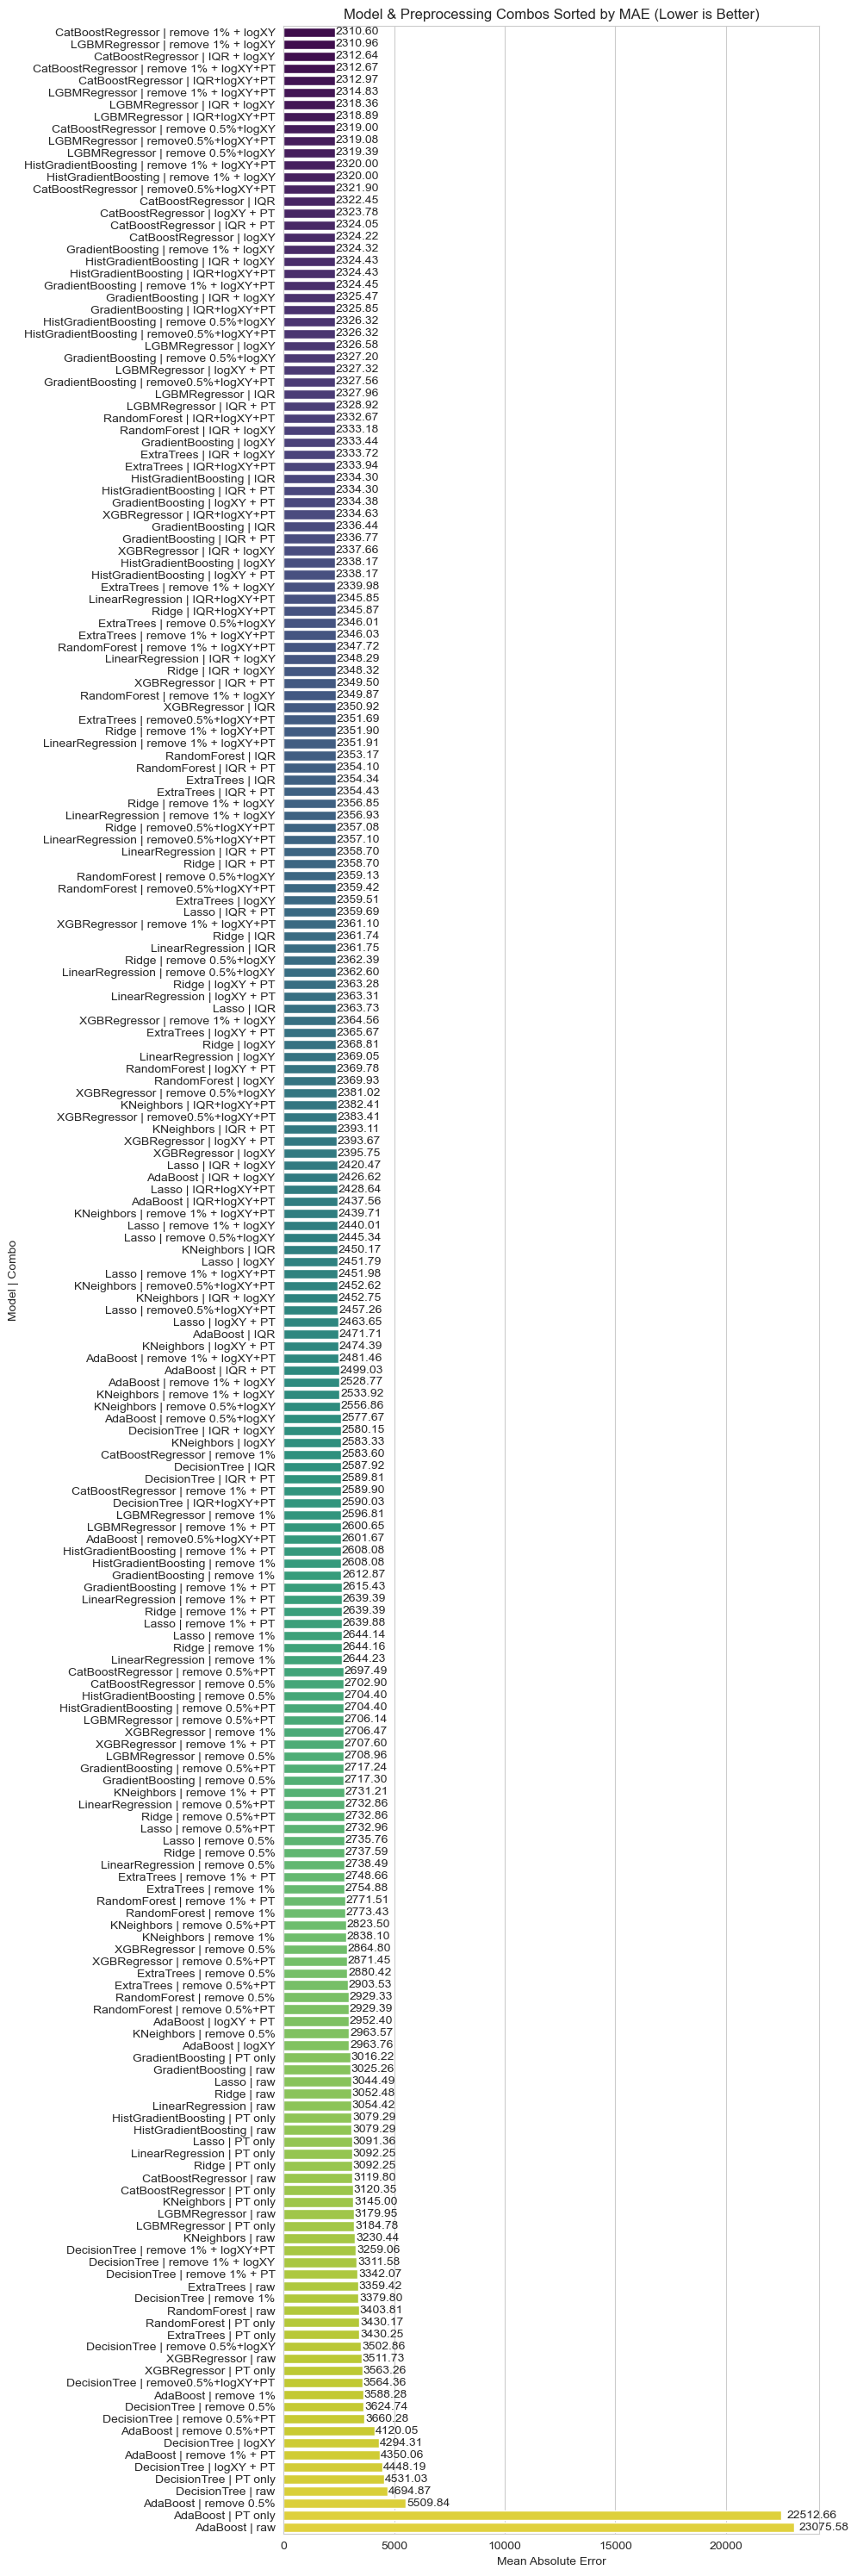

In [ ]:
# 6) 시각화
plt.figure(figsize=(10, 30))
ax = sns.barplot(
    x='MAE',
    y=df['model'] + ' | ' + df['combo'],
    data=df,
    palette='viridis'
)
plt.title('Model & Preprocessing Combos Sorted by MAE (Lower is Better)')
plt.xlabel('Mean Absolute Error')
plt.ylabel('Model | Combo')

for p in ax.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.text(width + 0.01 * width, y, f"{width:.2f}", va='center')

plt.tight_layout()
plt.show()

상위 10개 결과를 보면 PT는 효과적이지 못함.

197	CatBoostRegressor	remove 1% + logXY	1.482069e+08	2310.604051  
181	LGBMRegressor	remove 1% + logXY	1.482740e+08	2310.955857  
205	CatBoostRegressor	IQR + logXY	1.507058e+08	2312.644684  
199	CatBoostRegressor	remove 1% + logXY+PT	1.482037e+08	2312.666845  
207	CatBoostRegressor	IQR+logXY+PT	1.507446e+08	2312.967935  
183	LGBMRegressor	remove 1% + logXY+PT	1.482051e+08	2314.831134  
189	LGBMRegressor	IQR + logXY	1.507363e+08	2318.363901  
191	LGBMRegressor	IQR+logXY+PT	1.507647e+08	2318.894286  
201	CatBoostRegressor	remove 0.5%+logXY	1.480473e+08	2318.997003  
187	LGBMRegressor	remove0.5%+logXY+PT	1.481278e+08	2319.078350  
185	LGBMRegressor	remove 0.5%+logXY	1.480498e+08	2319.392478  
151	HistGradientBoosting	remove 1% + logXY+PT	1.485917e+08	2320.001678  
149	HistGradientBoosting	remove 1% + logXY	1.485917e+08	2320.001678  
203	CatBoostRegressor	remove0.5%+logXY+PT	1.480934e+08	2321.903168  
204	CatBoostRegressor	IQR	1.497469e+08	2322.446722  
195	CatBoostRegressor	logXY + PT	1.477143e+08	2323.780359  
206	CatBoostRegressor	IQR + PT	1.497796e+08	2324.049536  
193	CatBoostRegressor	logXY	1.476645e+08	2324.221921  
133	GradientBoosting	remove 1% + logXY	1.487699e+08	2324.320708  
157	HistGradientBoosting	IQR + logXY	1.508897e+08	2324.432263  

---

### 전처리

In [ ]:
# 전처리 함수: remove 1% + selective log1p on X
def preprocess(X, y, remove_pct=0.99):
    # 1) y 기준 이상치 제거
    thresh = np.percentile(y, remove_pct*100)
    mask = y <= thresh
    Xf = X.loc[mask].copy()
    yf = y.loc[mask].copy()
    # 2) y 로그 변환
    yf = np.log1p(yf)
    # 3) X selective log: skew>1 & non-negative
    skew_cols = Xf.columns[(Xf.skew().abs() > 1) & (Xf.min() >= 0)]
    Xf[skew_cols] = np.log1p(Xf[skew_cols])
    return Xf, yf, skew_cols

# train+valid 합치고 전처리
X_tv = pd.concat([X_train, X_valid], axis=0)
y_tv = pd.concat([y_train, y_valid], axis=0)
X_tv_proc, y_tv_proc, skew_cols = preprocess(X_tv, y_tv, remove_pct=0.99)

# test도 동일 전처리
X_test_proc = X_test.copy()
X_test_proc[skew_cols] = np.log1p(X_test_proc[skew_cols])

### 하이퍼파라미터 튜닝

In [113]:
from sklearn.model_selection import PredefinedSplit, GridSearchCV

# PredefinedSplit 세팅 (전처리 후 인덱스로 train/valid 구분)
# 전처리로 남은 X_tv_proc.index가 원래 train인지 valid인지 판별
is_train = X_tv_proc.index.isin(X_train.index)  # True 면 train, False 면 valid
test_fold = np.where(is_train, -1, 0)
ps = PredefinedSplit(test_fold=test_fold)

# 하이퍼파라미터 그리드 정의
param_grids = {
    'CatBoost': {
        'depth': [4,6,8],
        'learning_rate': [0.01,0.05,0.1],
        'l2_leaf_reg': [1,3,5],
        'iterations': [200,500]
    },
    'LGBM': {
        'n_estimators': [100,200],
        'learning_rate': [0.01,0.05],
        'num_leaves': [31,63],
        'max_depth': [ -1, 10 ]
    },
    'HistGB': {
        'max_iter': [100,200],
        'learning_rate': [0.01,0.05],
        'max_depth': [ None, 10 ],
        'min_samples_leaf': [1,3]
    },
    'GB': {
        'n_estimators': [100,200],
        'learning_rate': [0.01,0.05],
        'max_depth': [3,5],
        'min_samples_leaf': [1,3]
    }
}

# 모델 & 그리드 매핑
search_space = {
    'Cat':  (CatBoostRegressor(random_state=42, verbose=False), param_grids['CatBoost']),
    'LGBM': (LGBMRegressor(random_state=42), param_grids['LGBM']),
    'HistGB': (HistGradientBoostingRegressor(random_state=42), param_grids['HistGB']),
    'GB':   (GradientBoostingRegressor(random_state=42), param_grids['GB'])
}

grid_searches = {}
best_estimators = {}

# 하이퍼파라미터 튜닝 & 결과 저장
for name, (model, grid) in tqdm(search_space.items(), desc="Tuning models"):
    gs = GridSearchCV(
        model, grid, cv=ps,
        scoring='neg_mean_absolute_error',
        n_jobs=-1, verbose=1
    )
    gs.fit(X_tv_proc, y_tv_proc)
    grid_searches[name] = gs
    best_estimators[name] = gs.best_estimator_

# validation / test MAE 수집
rows = []
for name, gs in best_estimators.items():
    valid_mae = -grid_searches[name].best_score_
    y_pred_test = np.expm1(gs.predict(X_test_proc))
    test_mae  = mean_absolute_error(y_test, y_pred_test)
    rows.append({
        'model': name,
        'validation_MAE': valid_mae,
        'test_MAE': test_mae
    })

df_scores = pd.DataFrame(rows).set_index('model').sort_values('test_MAE')

Tuning models:   0%|          | 0/4 [00:00<?, ?it/s]

Fitting 1 folds for each of 54 candidates, totalling 54 fits


Tuning models:  25%|██▌       | 1/4 [00:27<01:23, 27.82s/it]

Fitting 1 folds for each of 16 candidates, totalling 16 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 59
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23544, numbe

Tuning models:  50%|█████     | 2/4 [00:53<00:52, 26.48s/it]

Fitting 1 folds for each of 16 candidates, totalling 16 fits


Tuning models:  75%|███████▌  | 3/4 [00:58<00:16, 16.59s/it]

Fitting 1 folds for each of 16 candidates, totalling 16 fits


Tuning models: 100%|██████████| 4/4 [03:08<00:00, 47.21s/it]


/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/4277901962.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


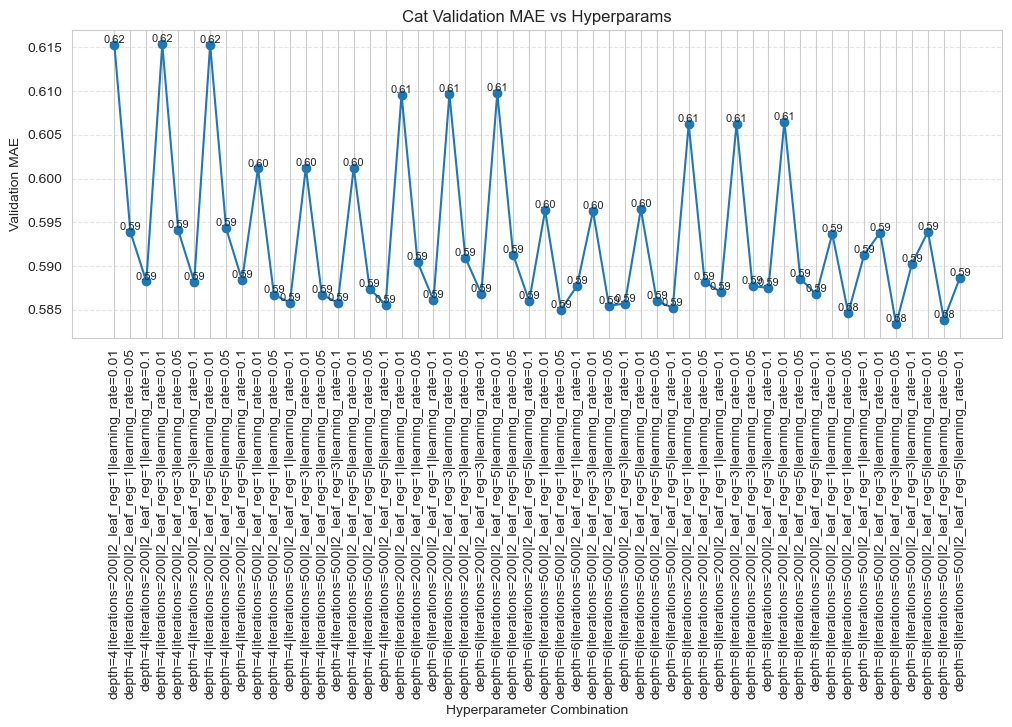

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/4277901962.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


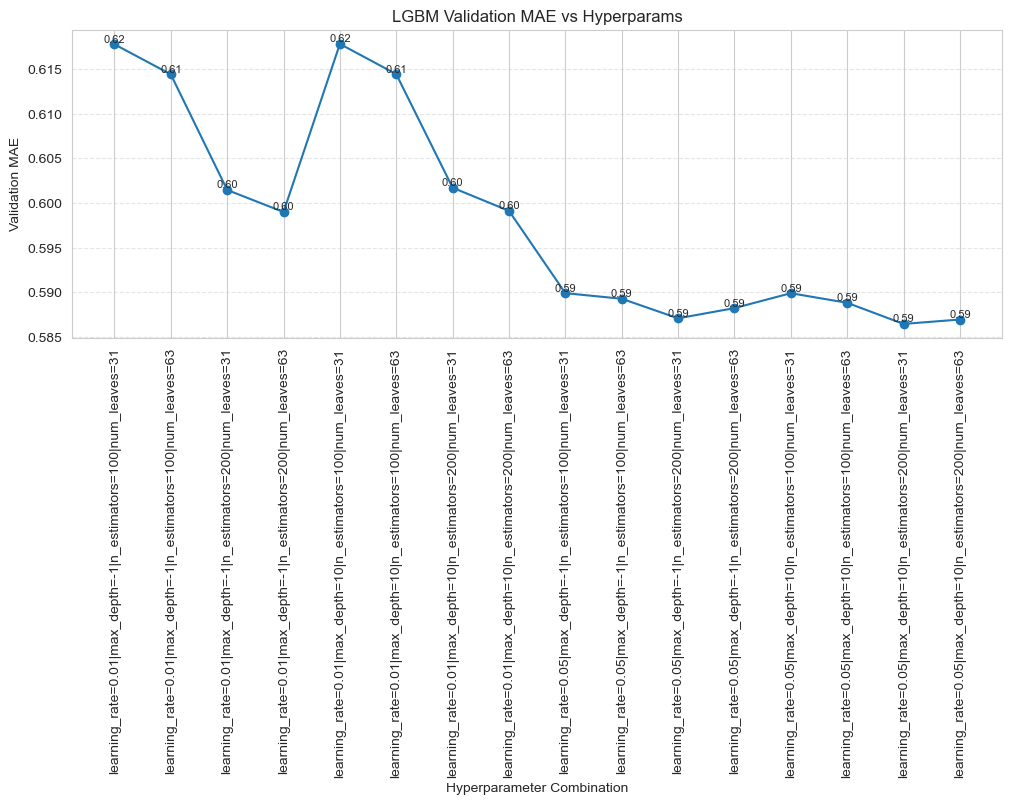

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/4277901962.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


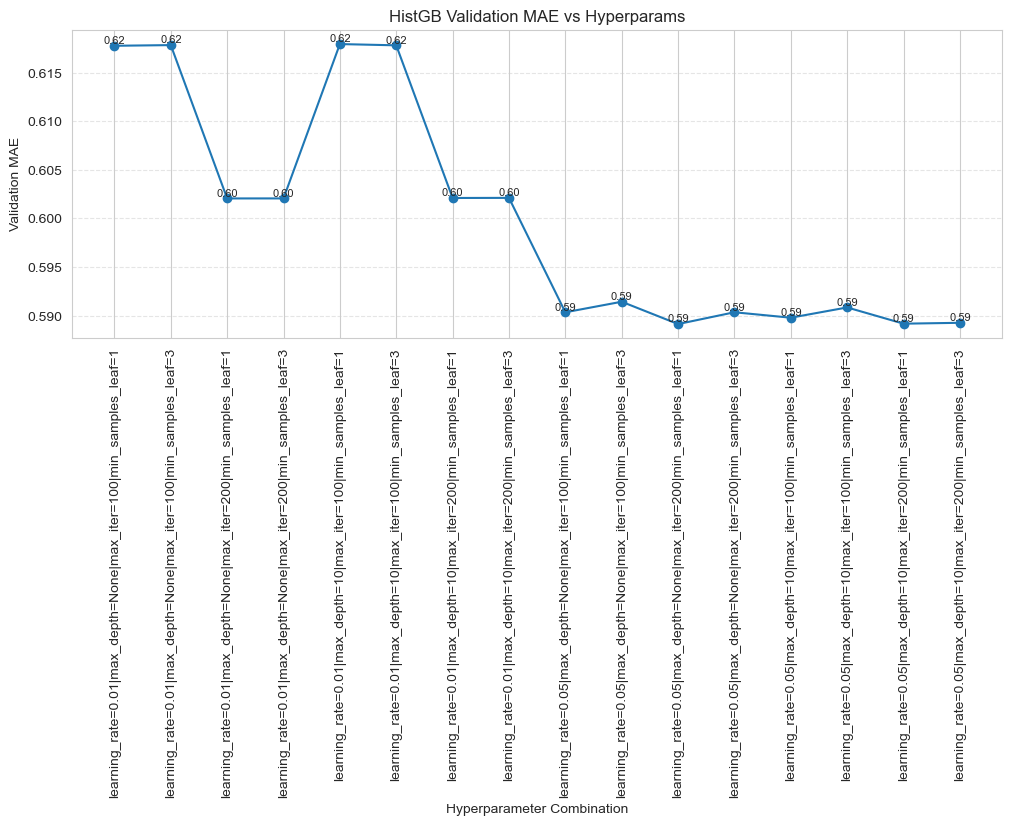

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_77476/4277901962.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


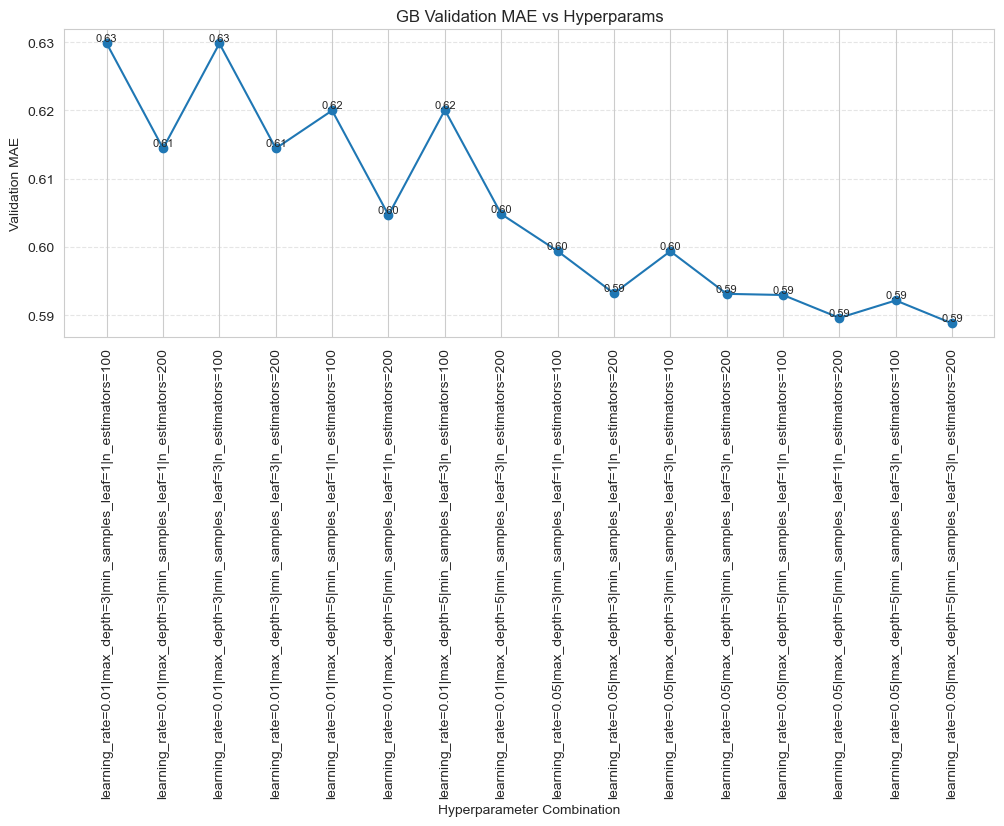

In [ ]:
#하이퍼파라미터 튜닝 시각화
for name, gs in grid_searches.items():
    df = pd.DataFrame(gs.cv_results_)
    df['validation_MAE'] = -df['mean_test_score']
    df['combo'] = df['params'].apply(
        lambda p: '|'.join(f"{k}={v}" for k,v in p.items())
    )
    df = df.reset_index()

    plt.figure(figsize=(12,4))
    plt.plot(df['index'], df['validation_MAE'], marker='o', linestyle='-')
    plt.xticks(df['index'], df['combo'], rotation=90)
    plt.title(f"{name} Validation MAE vs Hyperparams")
    plt.xlabel("Hyperparameter Combination")
    plt.ylabel("Validation MAE")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    for i, y in zip(df['index'], df['validation_MAE']):
        plt.text(i, y, f"{y:.2f}", ha='center', va='bottom', fontsize=8)
    plt.tight_layout()
    plt.show()

In [126]:
df_scores

,validation_MAE,test_MAE
model,,
Cat,0.583329,2309.619827
GB,0.588793,2316.858872
LGBM,0.586473,2317.579128
HistGB,0.589140,2320.968252


In [130]:
# 'search_space' 키(short name)와 'param_grids' 키(full name) 매핑
short_to_full = {
    'Cat': 'CatBoost',
    'LGBM': 'LGBM',
    'HistGB': 'HistGB',
    'GB': 'GB'
}

# 1) 테스트 MAE 최저 모델 이름
best_model_name = df_scores['test_MAE'].idxmin()
best_model = best_estimators[best_model_name]

# 2) 해당 모델의 하이퍼파라미터 중 그리드에서 검색한 항목만 추출
full_name = short_to_full[best_model_name]
grid_keys = set(param_grids[full_name].keys())
best_params = best_model.get_params()
tuned_params = {k: v for k, v in best_params.items() if k in grid_keys}

# 3) 최종 모델 성능 지표
best_metrics = df_scores.loc[best_model_name]
y_pred_test = np.expm1(best_model.predict(X_test_proc))
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"최종 선택 모델       : {best_model_name}")
print(f"튜닝된 하이퍼파라미터 : {tuned_params}")
print(f"Validation MAE       : {best_metrics['validation_MAE']:.2f}")
print(f"Test MAE             : {best_metrics['test_MAE']:.2f}")
print(f"Test MSE             : {test_mse:.4e}")

최종 선택 모델       : Cat
튜닝된 하이퍼파라미터 : {'depth': 8, 'iterations': 500, 'l2_leaf_reg': 3, 'learning_rate': 0.05}
Validation MAE       : 0.58
Test MAE             : 2309.62
Test MSE             : 1.4841e+08
